In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
unique_instructors = 94
prof_names = [f"Prof_{i}" for i in range(1, unique_instructors + 1)]
profs = np.random.choice(prof_names, size=n, replace=True)

data = pd.DataFrame({
    'prof': profs,
    'gender': np.random.choice(['Male', 'Female'], size=n),
    'beauty': np.round(np.random.normal(loc=3, scale=0.7, size=n), 2),
    'students': np.random.randint(10, 300, size=n),
    'tenure': np.random.choice(['Yes', 'No'], size=n, p=[0.6, 0.4]),
    'rating': np.round(np.random.normal(loc=4, scale=0.5, size=n), 2),
    'age': np.random.randint(30, 70, size=n),
    'division': np.random.choice(['Lower', 'Upper'], size=n, p=[0.5, 0.5])  # Course level
})

# Clean up unrealistic values
data['beauty'] = data['beauty'].clip(1, 5)
data['rating'] = data['rating'].clip(1, 5)


# --- Q1: Time Series or Cross Sectional ---

In [24]:
print("Q1 Answer: Cross-sectional — data is collected at one point in time per instructor.")

Q1 Answer: Cross-sectional — data is collected at one point in time per instructor.


# --- Q2: Mean, Median, Min, Max of students --

In [18]:
print("\nQ2: Student summary statistics")
print("Mean:", data['students'].mean())
print("Median:", data['students'].median())
print("Min:", data['students'].min())
print("Max:", data['students'].max())


Q2: Student summary statistics
Mean: 150.435
Median: 142.5
Min: 10
Max: 298


# --- Q3: Descriptive Statistics Table --

In [19]:
print("\nQ3: Descriptive Statistics Table")
print(data.describe())


Q3: Descriptive Statistics Table
           beauty    students      rating         age
count  200.000000  200.000000  200.000000  200.000000
mean     3.118600  150.435000    4.058900   50.090000
std      0.691257   88.021558    0.518808   11.054088
min      1.540000   10.000000    2.610000   30.000000
25%      2.670000   73.500000    3.695000   41.000000
50%      3.075000  142.500000    4.060000   50.500000
75%      3.632500  235.000000    4.420000   60.000000
max      4.670000  298.000000    5.000000   69.000000



# --- Q4: Histogram of Beauty Variable ---


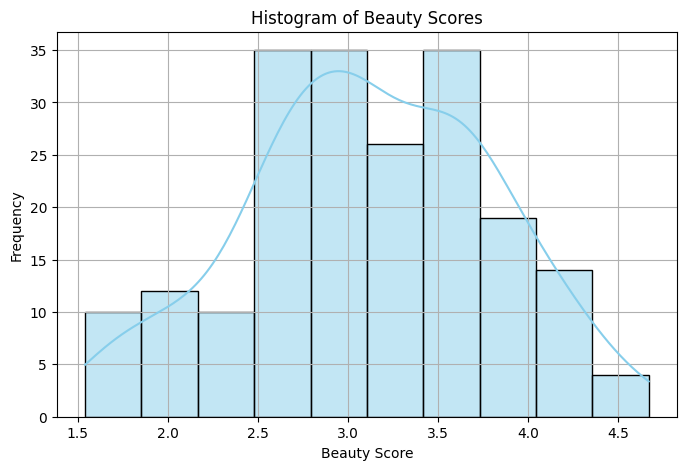


Q4 Comment:
The beauty scores appear to follow a roughly normal distribution centered around 3, with few extreme values.


In [20]:
plt.figure(figsize=(8,5))
sns.histplot(data['beauty'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Beauty Scores')
plt.xlabel('Beauty Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Comment on distribution
print("\nQ4 Comment:")
print("The beauty scores appear to follow a roughly normal distribution centered around 3, with few extreme values.")

# --- Q5: Average beauty score by gender ---


In [21]:
print("\nQ5: Beauty score by gender")
beauty_stats = data.groupby('gender')['beauty'].agg(['mean', 'std'])
print(beauty_stats)


Q5: Beauty score by gender
            mean       std
gender                    
Female  3.231000  0.654063
Male    2.981222  0.713995



# --- Q6: Tenure status by gender --


In [22]:
tenure_gender_counts = data.groupby(['gender', 'tenure']).size().unstack()
tenure_gender_percent = tenure_gender_counts.div(tenure_gender_counts.sum(axis=1), axis=0) * 100

print("\nQ6: Percentage of Tenured Professors by Gender")
print(tenure_gender_percent)

print("\nComment:")
if abs(tenure_gender_percent.loc['Male', 'Yes'] - tenure_gender_percent.loc['Female', 'Yes']) > 10:
    print("There appears to be a notable difference in tenure status by gender.")
else:
    print("Tenure status does not differ significantly by gender.")


Q6: Percentage of Tenured Professors by Gender
tenure         No        Yes
gender                      
Female  37.272727  62.727273
Male    41.111111  58.888889

Comment:
Tenure status does not differ significantly by gender.


In [23]:
data.to_csv('data.csv', index=False)
